<a href="https://colab.research.google.com/github/piotr-malek/new_repo/blob/main/London_biking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project I'll work with an aggregated dataset of London bike rentals during the period of Jan 4th 2015 through Jan 3rd 2017 (2 years). I'll aim to find some interesting and unobvious patterns about bikers in London.

I'll start off by downloading and reading the dataset and getting some basic facts about it

In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:

import opendatasets as od
import pandas as pd
import datetime as dt

od.download(
    "https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset")

Skipping, found downloaded files in "./london-bike-sharing-dataset" (use force=True to force download)


In [ ]:
bikes = pd.read_csv("london-bike-sharing-dataset/london_merged.csv")
bikes.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
bikes.tail(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
bikes.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

The dataset is very clean and ready to work with. There's one row for every hour during the 2 years span.


In [ ]:
bikes['cnt'].describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: cnt, dtype: float64

<Axes: ylabel='Frequency'>

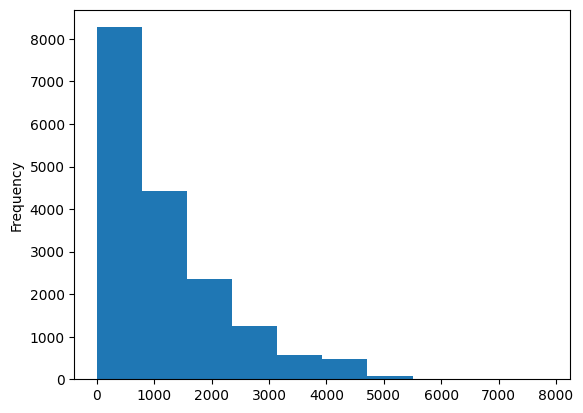

In [ ]:
bikes['cnt'].plot.hist()

The most interesting column is 'cnt' representing the count of bike rentals for a given hour. We can see that most rows oscillate in the 0-2000 vicinity, with only a handful of hours going above the 3k threshold.

Let's dive in into the hours when people rented bikes and try to find some trends there.

In [ ]:
bikes['timestamp'] = pd.to_datetime(bikes['timestamp'])
bikes['hour'] = bikes['timestamp'].dt.hour

<Axes: xlabel='hour'>

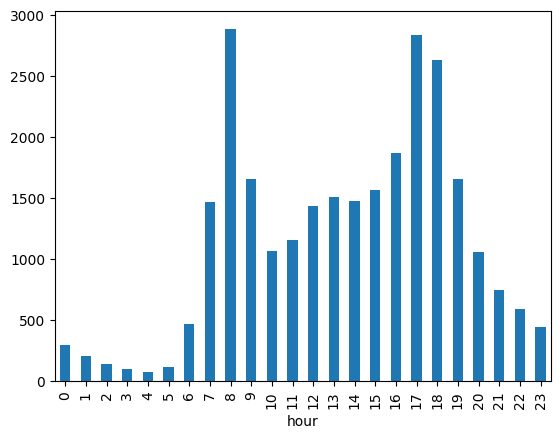

In [ ]:
bikes.groupby('hour')['cnt'].mean().plot.bar()

Digging deeper, we can see clear hourly patterns:
- there are 2 peaks - in the morning (around 8am) and in the late afternoon (around 5-6pm)
- the usage is much lower at night (between midnight and 7am)

We can conclude that most rentals are related to commute as they coincide with common 9-to-5 lifestyle but there's also lots of rentals in-between the 2 peak periods. Let's check how these charts look like on weekends and weekdays separately

<Axes: xlabel='hour'>

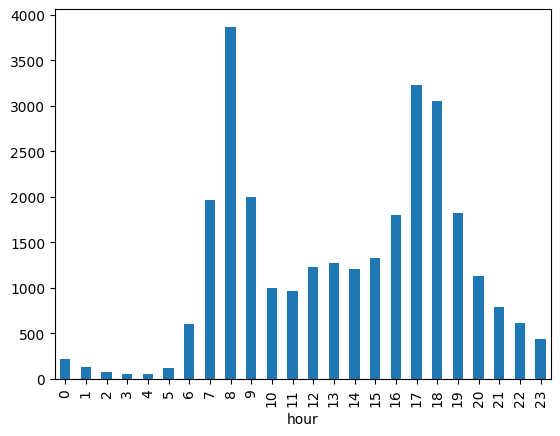

In [ ]:
bikes[bikes['is_weekend'] == 0].groupby('hour')['cnt'].mean().plot.bar()

<Axes: xlabel='hour'>

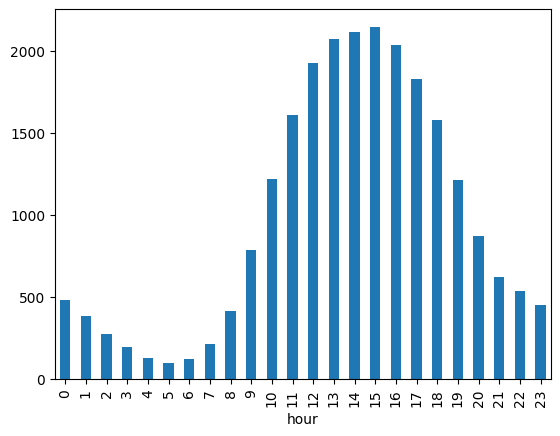

In [ ]:
bikes[bikes['is_weekend'] == 1].groupby('hour')['cnt'].mean().plot.bar()

<Axes: xlabel='is_weekend'>

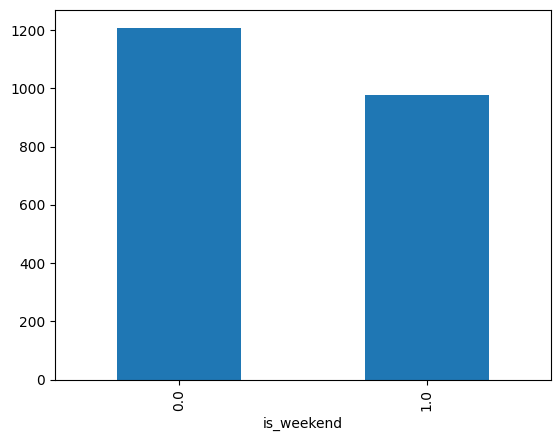

In [ ]:
bikes.groupby('is_weekend')['cnt'].mean().plot.bar()

Breaking the data down into weekend and non-weeekend rentals, we can tell more about the hourly patterns:
- on weekdays the 2 peaks i mentioned earlier are even more visible
- on weekends there are no significant peaks, instead the usage is substantial throughout the day, between 10am and up until 8pm, with the highest usage being sometime in the early afternoon hours.
- on average more bikes are rented on weekdays vs weekends but the difference isn't significant.

<Axes: xlabel='season'>

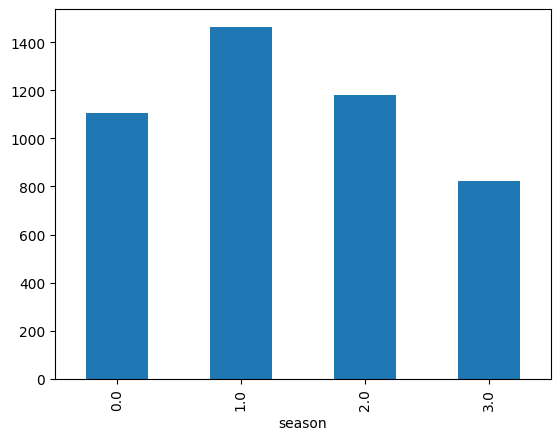

In [ ]:
bikes.groupby('season')['cnt'].mean().plot.bar()

In terms of seasons, summer is the busiest period while winter is the slowest, understandable as the temperatures significantly decrease in winter.

We'll look into temperatures a bit more, for now I'll create a new column and a chart to check how usage changes month to month.

<Axes: xlabel='month'>

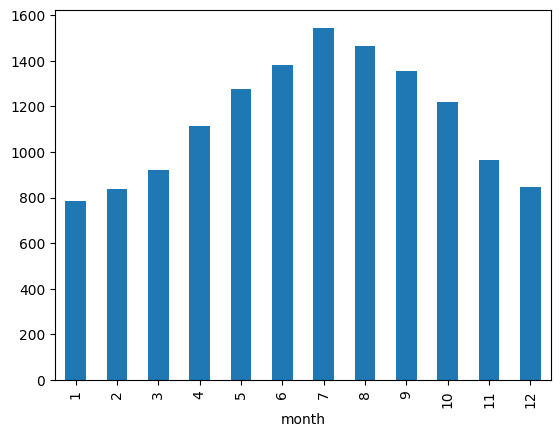

In [ ]:
bikes['month'] = bikes['timestamp'].dt.month
bikes.groupby('month')['cnt'].mean().plot.bar()

Understandably, the warmer a month, the more people ride bikes.

Now onto temperatures. I will use the "feels like" temperature ('t2') rather than an actual temperature but the trends should look just about the same regardless of the column chosen. Let's verify it just in case.

<Axes: xlabel='t2'>

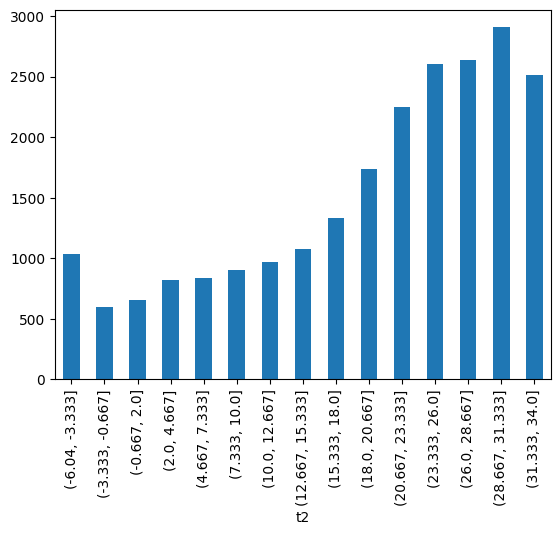

In [ ]:
temperature_bins = pd.cut(bikes['t2'], bins=15)
bikes.groupby(temperature_bins)['cnt'].mean().plot.bar()

<Axes: xlabel='t1'>

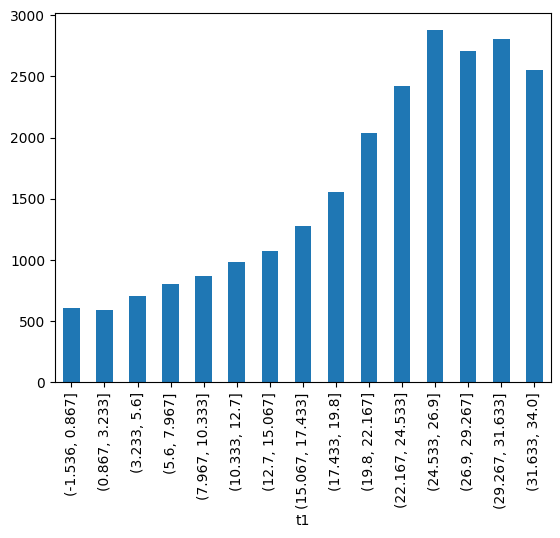

In [ ]:
temperature_bins_alt = pd.cut(bikes['t1'], bins=15)
bikes.groupby(temperature_bins_alt)['cnt'].mean().plot.bar()

In [ ]:
temperature_bins.value_counts()

(12.667, 15.333]    3103
(15.333, 18.0]      2672
(10.0, 12.667]      2211
(4.667, 7.333]      2129
(2.0, 4.667]        1650
(18.0, 20.667]      1410
(7.333, 10.0]       1284
(-0.667, 2.0]       1267
(20.667, 23.333]     840
(-3.333, -0.667]     377
(23.333, 26.0]       308
(26.0, 28.667]        73
(28.667, 31.333]      38
(-6.04, -3.333]       33
(31.333, 34.0]        19
Name: t2, dtype: int64

A closer look at temperatures (here, "feels like" temperature) seems to confirm a correlation between temperature and bike rental count although there are some weird abnormalities - it seems when temperatures get really low (<3.3 celcius), suddenly more people go pick up their bike.

It's worth noting, however, that that kinda temperatures happen very rarely in London (the total of 33 hours for the full 2 years on record) so the data may not be representative. Same for high temperatures (>26 celcius).

This is not to say data is wrong. Likely if 30+ temperatures were recorded in London more frequently, a lot of people would pick up the bikes. I doubt the same would happen in the freezing temperatures should they occur more often. But then, who knows what really drives Londoners?

<Axes: xlabel='weather_code'>

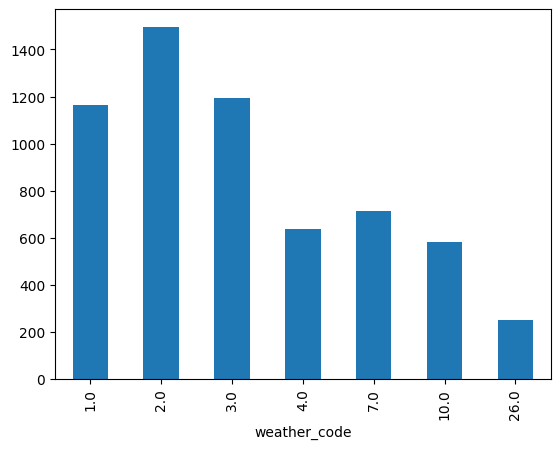

In [ ]:
bikes.groupby('weather_code')['cnt'].mean().plot.bar()

As for the weather_code, brief reminder from the dataset metadata:
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
* 2 = scattered clouds / few clouds
* 3 = Broken clouds
* 4 = Cloudy
* 7 = Rain/ light Rain shower/ Light rain
* 10 = rain with thunderstorm
* 26 = snowfall
* 94 = Freezing Fog

In [ ]:
bikes['weather_code'].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

Now that's quite interesting. You would think that the clearer the sky, the more people bike but no - the most popular weather for cycling is scattered clouds / no clouds. I thought it's maybe another outcome of a small sample but no - the clear or mostly clear sky seemed to be the most commom occurence during the two years on record.


In [ ]:
bikes[(bikes['hour'] > 7) & (bikes['hour'] <= 9)]['weather_code'].value_counts()

1.0     426
2.0     411
3.0     392
7.0     138
4.0      82
26.0      2
Name: weather_code, dtype: int64

In [ ]:
bikes[(bikes['hour'] > 17) & (bikes['hour'] <= 18)]['weather_code'].value_counts()

1.0    270
2.0    201
3.0    135
7.0     92
4.0     30
Name: weather_code, dtype: int64

I thought for a moment that maybe it's not the bikers preference but scatter clouds just seem to coincide with the peak hours but no, it's not the case - clear/mostly clear sky also is the most common during these hours.

How about wind?

<Axes: xlabel='wind_speed'>

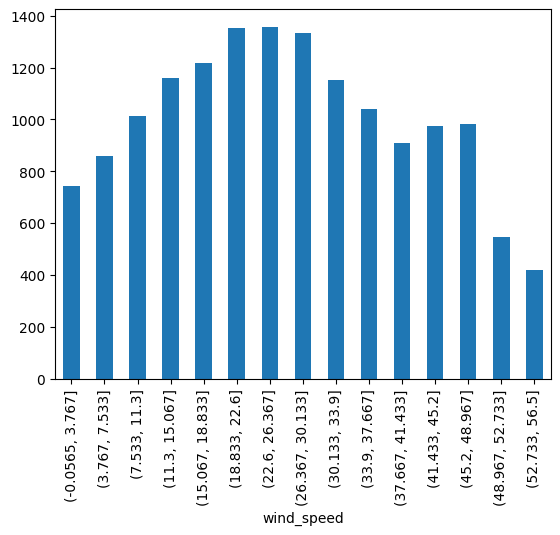

In [ ]:
wind_bins = pd.cut(bikes['wind_speed'], bins=15)
bikes.groupby(wind_bins)['cnt'].mean().plot.bar()

In [ ]:
wind_bins.value_counts()

(11.3, 15.067]      3342
(7.533, 11.3]       2905
(15.067, 18.833]    2605
(18.833, 22.6]      2536
(3.767, 7.533]      2384
(22.6, 26.367]      1506
(26.367, 30.133]     866
(30.133, 33.9]       481
(-0.0565, 3.767]     370
(33.9, 37.667]       220
(37.667, 41.433]     120
(41.433, 45.2]        46
(45.2, 48.967]        25
(48.967, 52.733]       5
(52.733, 56.5]         3
Name: wind_speed, dtype: int64

This one is also pretty interesting. It seems that biking network uwage grows with the speed of wind, peaking at around 19-26km/h. Biking at windless conditions would be too simple, wouldn't it?

And what about humidity?

<Axes: xlabel='hum'>

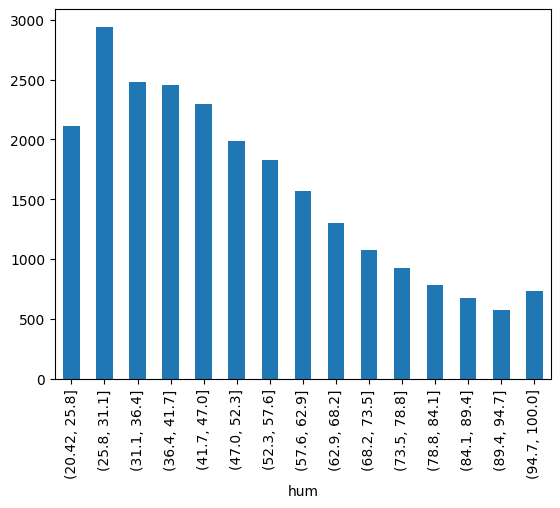

In [ ]:
hum_bins = pd.cut(bikes['hum'], bins=15)
bikes.groupby(hum_bins)['cnt'].mean().plot.bar()

In [ ]:
hum_bins.value_counts()

(78.8, 84.1]     2715
(73.5, 78.8]     2436
(84.1, 89.4]     2364
(68.2, 73.5]     2235
(62.9, 68.2]     1911
(89.4, 94.7]     1312
(57.6, 62.9]     1259
(52.3, 57.6]     1043
(47.0, 52.3]      789
(41.7, 47.0]      620
(36.4, 41.7]      327
(94.7, 100.0]     230
(31.1, 36.4]      124
(25.8, 31.1]       42
(20.42, 25.8]       7
Name: hum, dtype: int64

This one makes a lot of sense, on the other hand. The lower the humidity, the more people on bikes. There's a small drop at the lowest humidity bin but there were only 7 hours on record with such low humidity so likely we can consider them outliers.

And finally let's check what were the most successful months on record:

In [ ]:
bikes['year'] = bikes['timestamp'].dt.year
bikes.groupby(['year', 'month'])['cnt'].mean().sort_values(ascending=False)

year  month
2016  7        1572.910931
      8        1536.910811
2015  7        1514.441892
2016  9        1462.106881
2015  6        1441.076709
      8        1389.719086
2016  5        1346.686828
      6        1324.649645
      10       1259.362046
2015  9        1255.243319
      5        1203.512097
      10       1175.334239
      4        1156.581363
2016  4        1069.325452
      11        978.941586
2015  11        952.646976
      3         941.723951
2016  3         900.585734
      12        876.220430
      2         861.787791
2015  1         814.663189
      12        814.645946
      2         810.125186
2016  1         782.954301
2017  1         523.333333
Name: cnt, dtype: float64

And what about the best and worse weeks for renting bikes?

In [ ]:
bikes['week'] = bikes['timestamp'].dt.isocalendar().week
bikes.groupby(['year', 'week'])['cnt'].mean().sort_values(ascending=False)

year  week
2015  28      1778.839286
      32      1751.214286
2016  29      1733.136905
      32      1668.970238
      30      1653.454545
                 ...     
2015  53       578.270833
2016  52       498.381944
2015  1        384.750000
2016  53       303.625000
2017  52       267.541667
Name: cnt, Length: 108, dtype: float64

And how about days of a week? Note that 0 = Monday, 1 = Tuesday up until 6 = Sunday. So as we could earlier tell the usage is lower on weekends but it's also a bit lower on Mondays, interestingly.

<Axes: xlabel='day_of_week'>

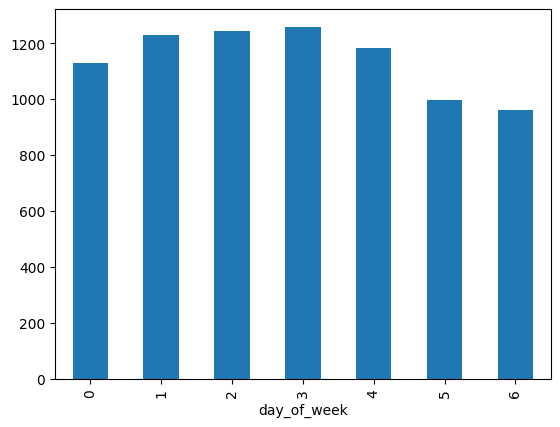

In [ ]:
bikes['day_of_week'] = bikes['timestamp'].dt.dayofweek
bikes.groupby('day_of_week')['cnt'].mean().plot.bar()

And let's also have a look at the top 10 and bottom 10 hours for renting bikes.

In [ ]:
bikes.nlargest(10, 'cnt')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,month,year,week,day_of_week
4470,2015-07-09 17:00:00,7860,23.0,22.0,27.0,11.0,1.0,0.0,0.0,1.0,17,7,2015,28,3
4461,2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2.0,0.0,0.0,1.0,8,7,2015,28,3
5138,2015-08-06 17:00:00,7208,22.5,22.5,55.0,17.5,2.0,0.0,0.0,1.0,17,8,2015,32,3
4471,2015-07-09 18:00:00,6913,22.5,21.5,29.0,13.0,1.0,0.0,0.0,1.0,18,7,2015,28,3
5129,2015-08-06 08:00:00,6585,19.0,19.0,78.0,12.0,7.0,0.0,0.0,1.0,8,8,2015,32,3
5139,2015-08-06 18:00:00,6394,21.5,21.5,58.5,20.0,2.0,0.0,0.0,1.0,18,8,2015,32,3
4469,2015-07-09 16:00:00,6033,23.0,22.0,26.0,11.0,1.0,0.0,0.0,1.0,16,7,2015,28,3
4446,2015-07-08 17:00:00,5560,20.0,20.0,53.0,30.0,2.0,0.0,0.0,1.0,17,7,2015,28,2
14736,2016-09-14 08:00:00,5422,22.5,22.5,71.0,14.0,1.0,0.0,0.0,2.0,8,9,2016,37,2
14746,2016-09-14 18:00:00,5345,26.0,26.0,48.0,11.0,1.0,0.0,0.0,2.0,18,9,2016,37,2


I randomly checked what happened on July 9th 2015 and you know what, there was a reason for so many bikes rented on that day. [As Guardian informs](https://www.theguardian.com/uk-news/live/2015/jul/09/tube-strike-london-underground-live-updates), the largest London Tube strike since 2002 happened on that day.

The strike [happened again](https://www.bbc.com/news/live/uk-england-london-33674627) exactly 4 weeks later and it led to another spike in bike rentals.

In [ ]:
bikes.nsmallest(10, 'cnt')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,month,year,week,day_of_week
2015,2015-03-29 01:00:00,0,10.5,8.5,77.0,33.0,7.0,0.0,1.0,0.0,1,3,2015,13,6
16361,2016-11-21 03:00:00,9,6.0,3.5,93.0,12.0,7.0,0.0,0.0,2.0,3,11,2016,47,0
17393,2017-01-03 03:00:00,10,0.0,-4.0,93.0,13.0,1.0,0.0,0.0,3.0,3,1,2017,1,1
11070,2016-04-12 03:00:00,11,9.0,7.0,87.0,14.0,7.0,0.0,0.0,0.0,3,4,2016,15,1
9293,2016-01-28 02:00:00,12,6.5,3.5,68.5,19.5,1.0,0.0,0.0,3.0,2,1,2016,4,3
9575,2016-02-09 03:00:00,12,6.0,2.0,71.0,24.0,3.0,0.0,0.0,3.0,3,2,2016,6,1
9743,2016-02-16 03:00:00,12,0.5,-0.5,90.0,5.0,1.0,0.0,0.0,3.0,3,2,2016,7,1
12798,2016-06-23 03:00:00,12,19.0,19.0,94.0,8.0,7.0,0.0,0.0,1.0,3,6,2016,25,3
218,2015-01-13 03:00:00,13,11.0,11.0,85.0,19.0,7.0,0.0,0.0,3.0,3,1,2015,3,1
11766,2016-05-11 03:00:00,13,15.0,15.0,94.0,8.0,7.0,0.0,0.0,0.0,3,5,2016,19,2


And it terms of smallest rental numbers, there was, to my knowledge, nothing in particular happening on March 29th 2015 at 1am. It was just cold, windy, rainy, and so on. I'd rather stay home too.

So to wrap things up - there were not so many surprising findings in this dataset. The rule of a thumb is - the warmer it gets, the more people choose to bike.

I came across, however, several interesting findings:
- more people bike when the sky is partly cloudy than when it's (almost) clear
- Londoners prefer when it's windy, at least a bit.
- London Tube strikes contribute a lot to bike rental counts.

Thanks for reading!